# Supervised Learning

<i>**Regresi linear adalah metode pendekatan sebagai kajian terhadap ketergantuangansatu variabel, yaitu anntara variabel terikat Y dan satu atau lebih variabel bebas yang disebut X - Gujarati(2009)**</i>

# Di dalam suatu persamaan regresi terdapat 2 macam variabel yaitu

- variabel terikat ( variabel dependen ) : variabel yang nilainya tergantung dari variabael lain, biasanya dinyatakan dengan Y
- variabel bebas( variabel independen ) : variabel yang nilainya tidak tergantung dari variabel lain, biasanya dinyatakan dengan X

# Berdasrkan penggunaan variabel bebas, dibedakan menjadi:

- Simple Linear Regression<br>
variabel bebas yang hnya satu saja. Oleh karena hanya memiliki satu variabel bebas, maka hanya akan terdapat variabel input X dan output Y

**PERSAMAAN**<br>
**y = mx+b+e**
- y = dependent variabel
- m - slope dari garis(peersamaan diatas merupakan sebuah garis)
- x = independent variabel
- b = intercept
- e = error
</br>
<br>
- **Multiple Linear Regression**<br>
variabel beabs yang terlibat tidak hanya satu saja melainkan beberapa variabel bebas. Hal ini dikarenakan input yang digunakan lebih dari satu dimensi. 

**PERSAMAAN**<br>
<b>Y = b+e+m1x1+m2x2+...+mn*xn</b>
- Y = dependent variabel
- mn = koefisien dari persamaan
- xn = independent variabel
- b = intercept
- e = error


# Contoh Kasus

Udin hendak membeli rumah di daerah KING COUNTRY US, dengan kriteria sbb:
1. Jumlah Bedroom = 3
2. Jumlah Bathrooms = 2
3. Luas Rumahnya = 1800 sqft
4. Dengan grade 7
5. Tahun Pembuatann 1990

- Bantu Udin untuk memprediksi rumah idealnya
- Data harga rumah dapat diambil dari kaggle : [data rumah kaggle](https://www.kaggle.com/code/prabhats/linear-regression-on-house-price/data?select=kc_house_data.csv)

# Penyelesaian Masalah

jika dilihat dari apa yang diinginkan Udin, maka kita dapat menngunakan metode Multiple Linear Regression dikarenakan memiliki lebih dari 1 variabel
bebas

-  Variabel bebas disini ialah : rumah dengan jumiah kamar tidur itu 3, jumlah kamar mandinya itu 2, luas rumahnya itu 1800sqft, grade rumahnya 7 dan
tahun pembangunanya pada tahun 1990,
- terhadap variabel terikat ialah : Harga

## Import library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from scipy.stats import skew

from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

import warnings
warnings.filterwarnings('ignore')

## Load Dataset

In [65]:
data = pd.read_csv('kc_house_data.csv')
data
# df = pd.read_csv(path, usecols=['xx','xx'])

id             date     price  bedrooms  bathrooms  \
0      7129300520  20141013T000000  221900.0         3       1.00   
1      6414100192  20141209T000000  538000.0         3       2.25   
2      5631500400  20150225T000000  180000.0         2       1.00   
3      2487200875  20141209T000000  604000.0         4       3.00   
4      1954400510  20150218T000000  510000.0         3       2.00   
...           ...              ...       ...       ...        ...   
21608   263000018  20140521T000000  360000.0         3       2.50   
21609  6600060120  20150223T000000  400000.0         4       2.50   
21610  1523300141  20140623T000000  402101.0         2       0.75   
21611   291310100  20150116T000000  400000.0         3       2.50   
21612  1523300157  20141015T000000  325000.0         2       0.75   

       sqft_living  sqft_lot  floors  waterfront  view  ...  grade  \
0             1180      5650     1.0           0     0  ...      7   
1             2570      7242     2.0           0     0  ...      7   
2              770     10000     1.0           0     0  ...      6   
3             1960      5000     1.0           0     0  ...      7   
4             1680      8080     1.0           0     0  ...      8   
...            ...       ...     ...         ...   ...  ...    ...   
21608         1530      1131     3.0           0     0  ...      8   
21609         2310      5813     2.0           0     0  ...      8   
21610         1020      1350     2.0           0     0  ...      7   
21611         1600      2388     2.0           0     0  ...      8   
21612         1020      1076     2.0           0     0  ...      7   

       sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat  \
0          1180.0              0      1955             0    98178  47.5112   
1          2170.0            400      1951          1991    98125  47.7210   
2           770.0              0      1933             0    98028  47.7379   
3          1050.0            910      1965             0    98136  47.5208   
4          1680.0              0      1987             0    98074  47.6168   
...           ...            ...       ...           ...      ...      ...   
21608      1530.0              0      2009             0    98103  47.6993   
21609      2310.0              0      2014             0    98146  47.5107   
21610      1020.0              0      2009             0    98144  47.5944   
21611      1600.0              0      2004             0    98027  47.5345   
21612      1020.0              0      2008             0    98144  47.5941   

          long  sqft_living15  sqft_lot15  
0     -122.257           1340        5650  
1     -122.319           1690        7639  
2     -122.233           2720        8062  
3     -122.393           1360        5000  
4     -122.045           1800        7503  
...        ...            ...         ...  
21608 -122.346           1530        1509  
21609 -122.362           1830        7200  
21610 -122.299           1020        2007  
21611 -122.069           1410        1287  
21612 -122.299           1020        1357  

[21613 rows x 21 columns]

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21611 non-null  float64
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

## ambil features data yang diperlukan dan copy dataframe

In [4]:
df = data.copy()
df = (df[['bedrooms','bathrooms','sqft_living','grade','yr_built','price']])
df

bedrooms  bathrooms  sqft_living  grade  yr_built     price
0             3       1.00         1180      7      1955  221900.0
1             3       2.25         2570      7      1951  538000.0
2             2       1.00          770      6      1933  180000.0
3             4       3.00         1960      7      1965  604000.0
4             3       2.00         1680      8      1987  510000.0
...         ...        ...          ...    ...       ...       ...
21608         3       2.50         1530      8      2009  360000.0
21609         4       2.50         2310      8      2014  400000.0
21610         2       0.75         1020      7      2009  402101.0
21611         3       2.50         1600      8      2004  400000.0
21612         2       0.75         1020      7      2008  325000.0

[21613 rows x 6 columns]

Penjelasan data features:
1. bedrooms = jumlah kamar tidur
2. bathrooms = jumlah kamar mandi
3. sqft_living = luas rumah dalam satuan sqft
4. grade = grading sysstem dari pemerinath King Country US
5. yr_built = tahun dimana rumah dibangaun
6. price = harga rumah(US $)

In [5]:
# mengtahui jumlah kolom dan baris dari data
df.shape

(21613, 6)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   bedrooms     21613 non-null  int64  
 1   bathrooms    21613 non-null  float64
 2   sqft_living  21613 non-null  int64  
 3   grade        21613 non-null  int64  
 4   yr_built     21613 non-null  int64  
 5   price        21613 non-null  float64
dtypes: float64(2), int64(4)
memory usage: 1013.2 KB


In [7]:
# meliihat statistical description dari data
df.describe()

bedrooms     bathrooms   sqft_living         grade      yr_built  \
count  21613.000000  21613.000000  21613.000000  21613.000000  21613.000000   
mean       3.370842      2.114757   2079.899736      7.656873   1971.005136   
std        0.930062      0.770163    918.440897      1.175459     29.373411   
min        0.000000      0.000000    290.000000      1.000000   1900.000000   
25%        3.000000      1.750000   1427.000000      7.000000   1951.000000   
50%        3.000000      2.250000   1910.000000      7.000000   1975.000000   
75%        4.000000      2.500000   2550.000000      8.000000   1997.000000   
max       33.000000      8.000000  13540.000000     13.000000   2015.000000   

              price  
count  2.161300e+04  
mean   5.400881e+05  
std    3.671272e+05  
min    7.500000e+04  
25%    3.219500e+05  
50%    4.500000e+05  
75%    6.450000e+05  
max    7.700000e+06

- pada features bathrooms terdapat nilai pecahan. Maka kita ubah dulu jenis data yang semula float menjadi int
- pada features bedroomm terdapat nilai 33, jadi kemungkinan itu typo dan akan diganti menjadi 3


In [8]:
# merubah tipe data bathroomsdari float menjadi int
df['bathrooms'] = df['bathrooms'].astype(int)

In [9]:
#mengganti nilai 33 mejd 3
df['bedrooms'] = df['bedrooms'].replace(33,3)

## Handling Missing Values

In [10]:
df.isnull().sum()

bedrooms       0
bathrooms      0
sqft_living    0
grade          0
yr_built       0
price          0
dtype: int64

## Cek Duplikasi Data

In [11]:
df.duplicated().sum()

45

## EDA

In [12]:
df.head()

bedrooms  bathrooms  sqft_living  grade  yr_built     price
0         3          1         1180      7      1955  221900.0
1         3          2         2570      7      1951  538000.0
2         2          1          770      6      1933  180000.0
3         4          3         1960      7      1965  604000.0
4         3          2         1680      8      1987  510000.0

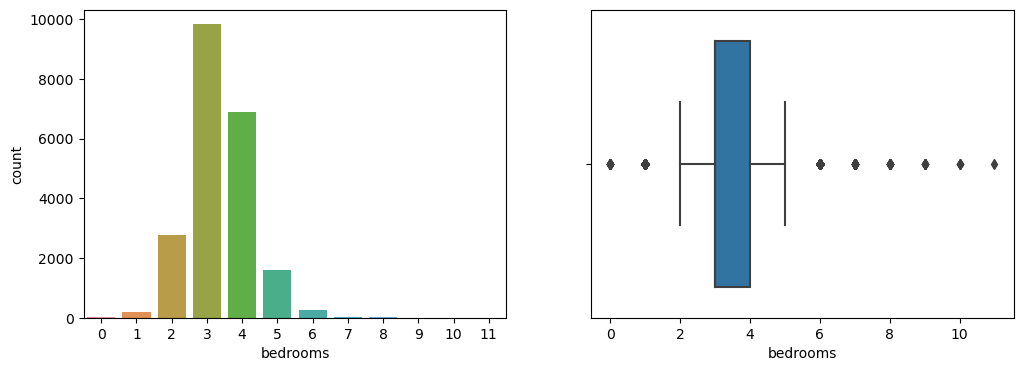

In [13]:
# univariate analysis bedrooms
# melihat distribusi dari bedrooms
f = plt.figure(figsize=(12,4))

f.add_subplot(1,2,1)
sns.countplot(df['bedrooms'])

f.add_subplot(1,2,2)
sns.boxplot(df['bedrooms'])

plt.show()

- dapat dilihat bahwa sebagian besar jumlah kamamr tidur diangka 3 dan 4
- Data memiliki banyak outliers

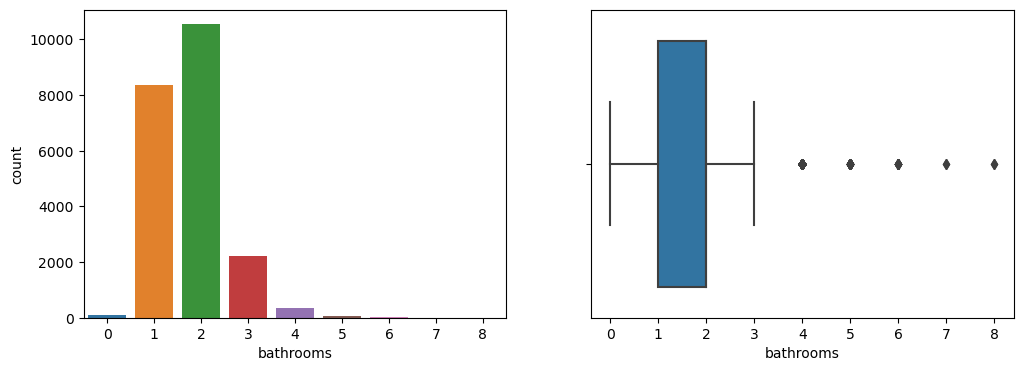

In [14]:
# univariate analysis bathrooms
# melihat distribusi dari bathrooms
f = plt.figure(figsize=(12,4))

f.add_subplot(1,2,1)
sns.countplot(df['bathrooms'])

f.add_subplot(1,2,2)
sns.boxplot(df['bathrooms'])

plt.show()

- jumlah kamar mandi paling banyak verada oada angka 1 dan 2
- yang menarik disini adalah dimana ada rumah yang tidak ada kamar mandinya/ 0
- ada nilai outlier 

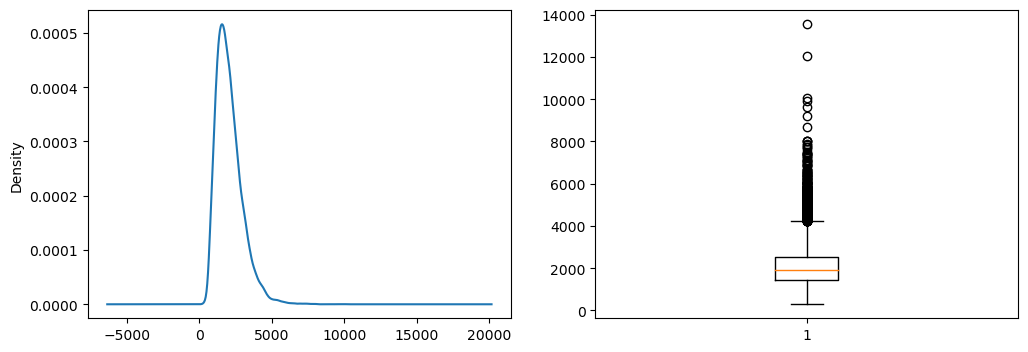

In [15]:
# univariate analysis sqft_living
# melihat distribusi dari sqft_living
f = plt.figure(figsize=(12,4))

f.add_subplot(1,2,1)
df['sqft_living'].plot(kind='kde')

f.add_subplot(1,2,2)
plt.boxplot(df['sqft_living'])

plt.show()

- density dari distribusi luas rumah berada di sekitar angka 2000an
- banyak outliers

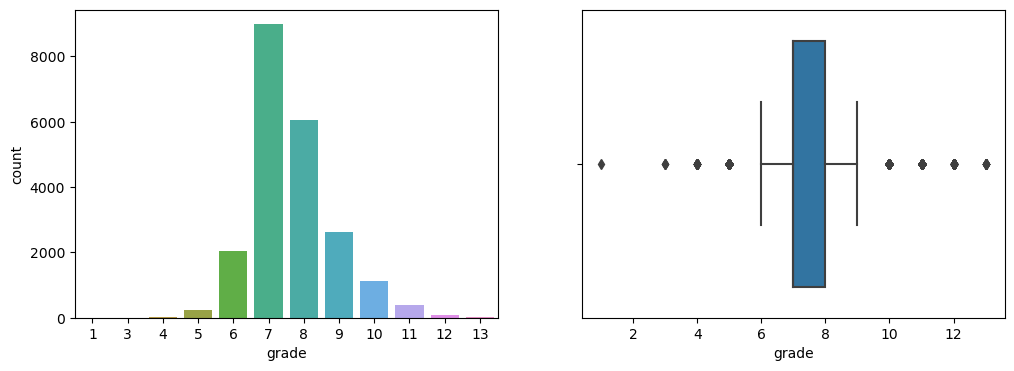

In [16]:
# univariate analysis grade
# melihat distribusi dari grade
f = plt.figure(figsize=(12,4))

f.add_subplot(1,2,1)
sns.countplot(df['grade'])

f.add_subplot(1,2,2)
sns.boxplot(df['grade'])

plt.show()

- sebagian besar rumah d Country US memiliki gradea 7 dan 8
- dilihat dari boxplot, data memiliki beberapa ooutlier

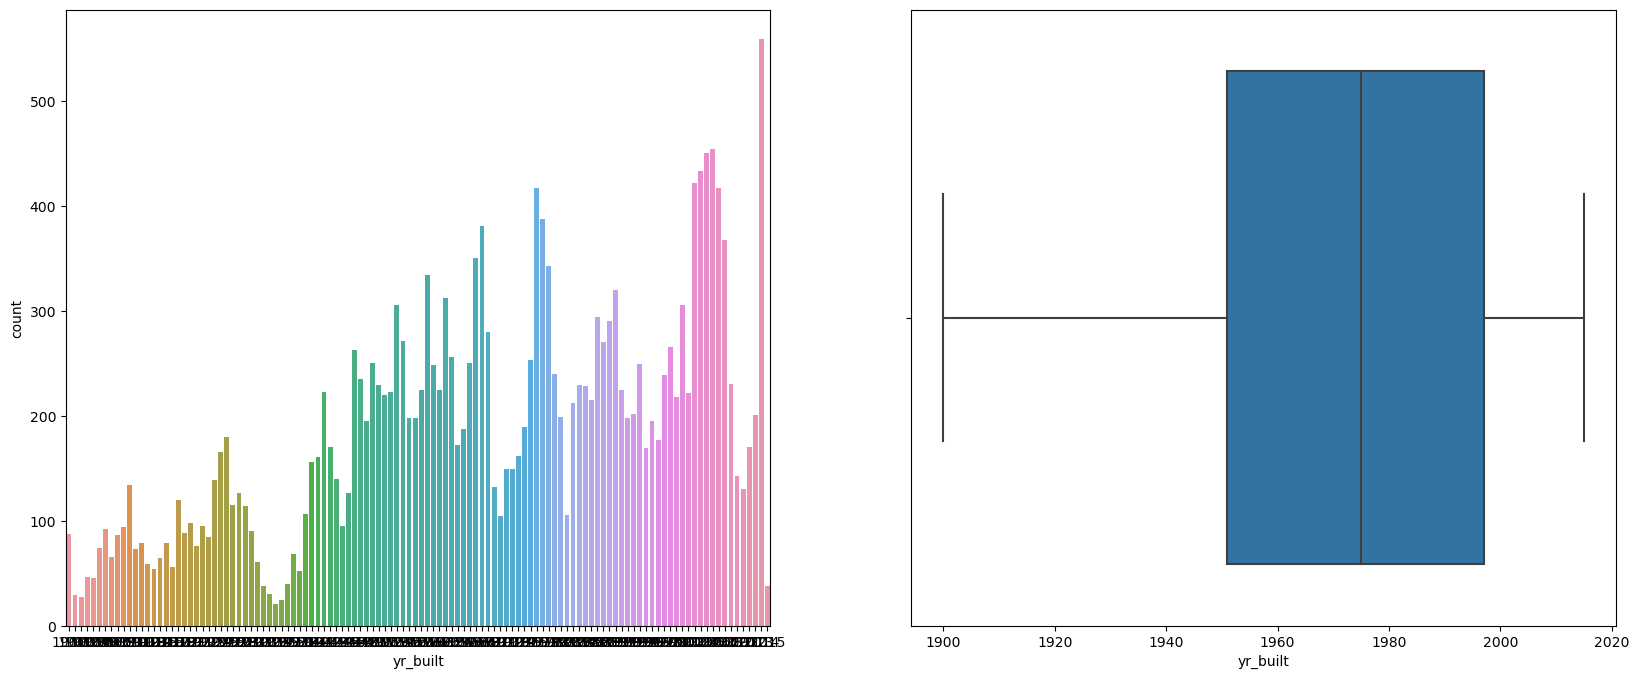

In [17]:
# univariate analysis yr_built
# melihat distribusi dari yr_built
f = plt.figure(figsize=(20,8))

f.add_subplot(1,2,1)
sns.countplot(df['yr_built'])

f.add_subplot(1,2,2)
sns.boxplot(df['yr_built'])

plt.show()

- dapat dilhat bahwa semakin tua umur rumah, semakin sedikit orang yang mennjual rumah tsb
- density terdapat disekitar tahun 1980an
- data tidak memiliki outlier

<Figure size 1000x800 with 0 Axes>

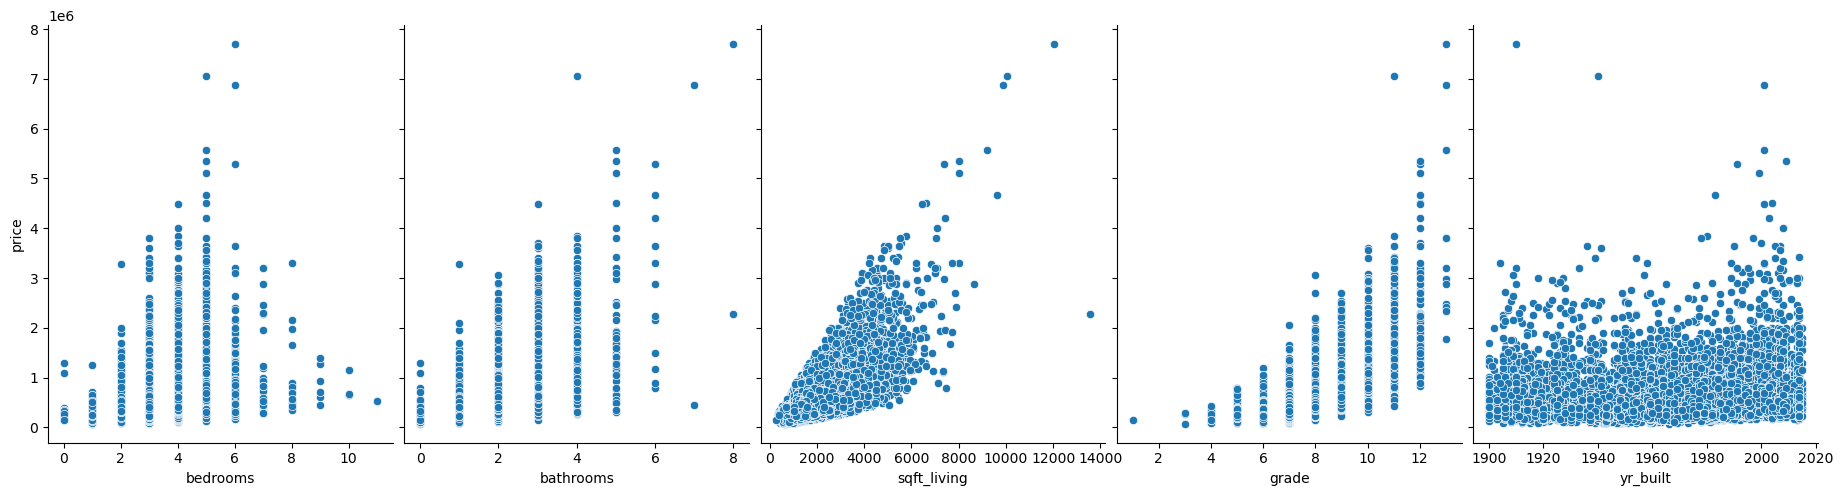

In [18]:
# bivariate analysis antara independent variabel dan dependent variabel
# melihat hubungan antara independent dan dependent 
# menggunakan pairplot
plt.figure(figsize=(10,8))
sns.pairplot(data=df, x_vars=['bedrooms','bathrooms','sqft_living','grade','yr_built'], y_vars=['price'], size=5, aspect=0.75)
plt.show()

In [38]:
# mengetahui nilai korelasi dari independent variabel dan dependent variabel
df.corr().style.background_gradient().set_precision(2)

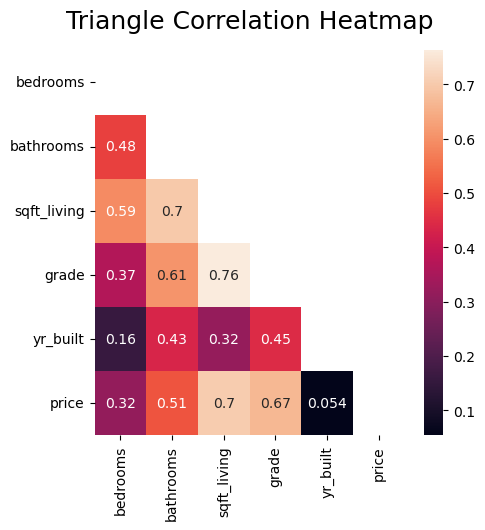

In [20]:
plt.figure(figsize=(5, 5))
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
heatmap = sns.heatmap(df.corr(), annot=True, mask=mask)
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

- dari heamap korelasi diatas, dapat dilihat sqft_living mempunyai hubungan linear positif yang sangat kuat dengan grade dan price jika dibandingkan yang lain
- nilai korelasi yr_built hampir mendekati nol yang menandakan bahwa usia rumah tidak mempengrauhi harga rumah

## Handling Outlier

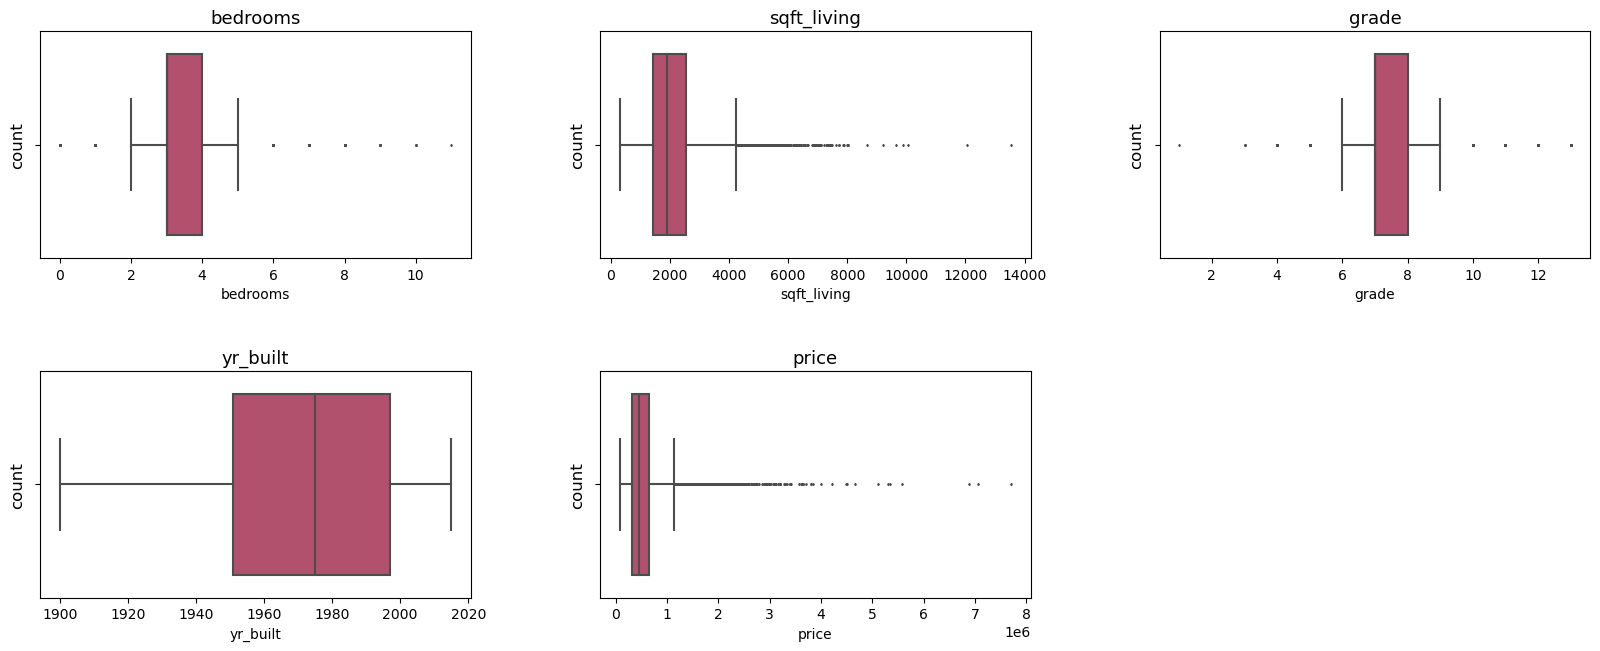

In [21]:
num_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()
plt.figure(figsize =(20,25))
for i, col in enumerate(num_cols):
    plt.subplot(6,3,i+1)
    plt.title(col, fontsize=13)
    plt.xlabel(f"skew of {col}:{skew(df[col])}")
    plt.ylabel("count",fontsize=12)
    plt.subplots_adjust(hspace=0.5, wspace=0.3)
    sns.boxplot(data=df, x=col, palette='flare', fliersize=1)

In [22]:
num_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()
def RemoveOutliers(num_cols):
    for col in num_cols:
        iqr = df[col].quantile(0.75)-df[col].quantile(0.25)
        lower_threshold = df[col].quantile(0.25)-(iqr*1.5)
        upper_threshold = df[col].quantile(0.75)+(iqr*1.5)
        print(f"Rentang nilai outlier pada fitur {col} : <{round(lower_threshold,2)} atau >{round(upper_threshold,2)}")
        df.loc[(df[col]<=lower_threshold),col] = lower_threshold
        df.loc[(df[col]>=upper_threshold),col] = upper_threshold
RemoveOutliers(num_cols)

Rentang nilai outlier pada fitur bedrooms : <1.5 atau >5.5
Rentang nilai outlier pada fitur sqft_living : <-257.5 atau >4234.5
Rentang nilai outlier pada fitur grade : <5.5 atau >9.5
Rentang nilai outlier pada fitur yr_built : <1882.0 atau >2066.0
Rentang nilai outlier pada fitur price : <-162625.0 atau >1129575.0


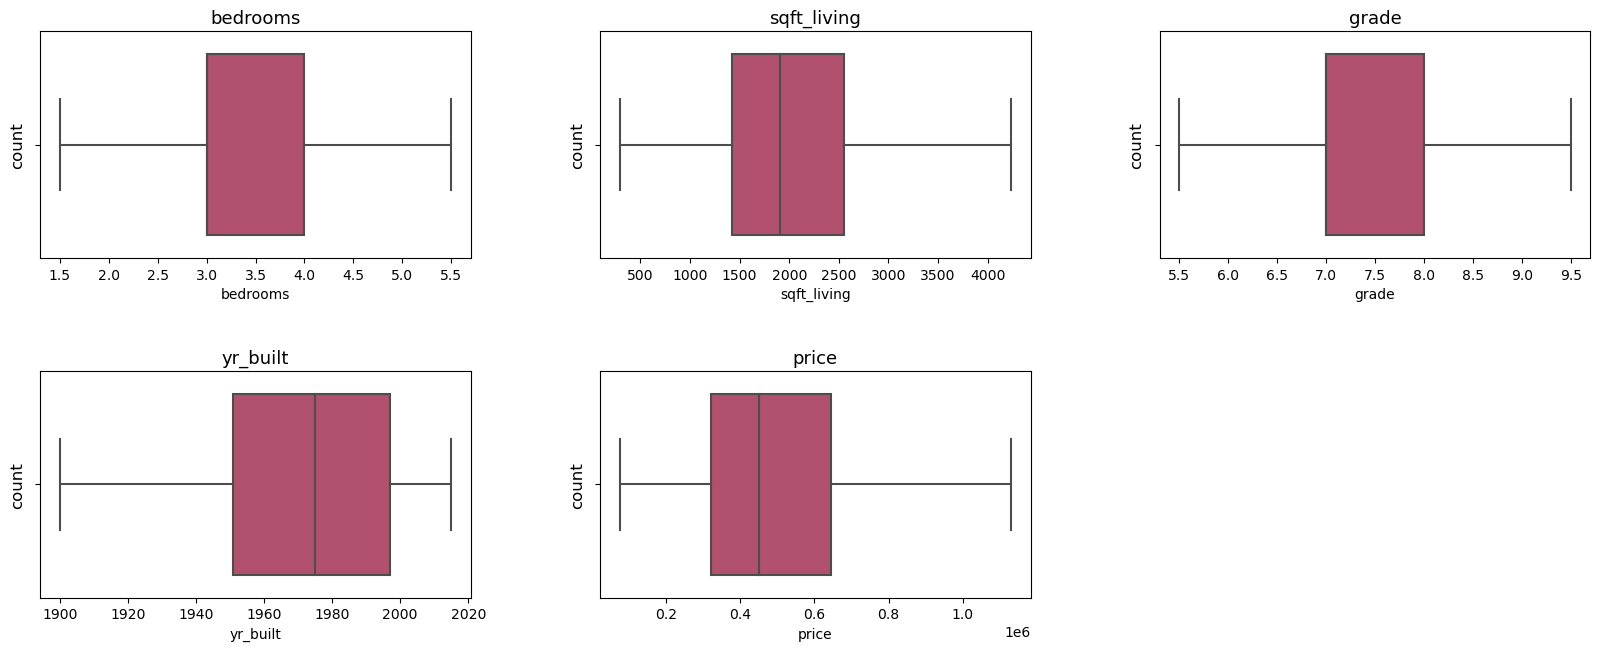

In [23]:
num_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()
plt.figure(figsize =(20,25))
for i, col in enumerate(num_cols):
    plt.subplot(6,3,i+1)
    plt.title(col, fontsize=13)
    plt.xlabel(f"skew of {col}:{skew(df[col])}")
    plt.ylabel("count",fontsize=12)
    plt.subplots_adjust(hspace=0.5, wspace=0.3)
    sns.boxplot(data=df, x=col, palette='flare', fliersize=1)

## Scalling Data

In [24]:
MM_scaler = MinMaxScaler().fit_transform(df)

In [25]:
MM_scaler_df = pd.DataFrame(MinMaxScaler().fit_transform(df), columns=df.columns)
MM_scaler_df.head()

bedrooms  bathrooms  sqft_living  grade  yr_built     price
0     0.375      0.125     0.225631  0.375  0.478261  0.139298
1     0.375      0.250     0.578020  0.375  0.443478  0.439039
2     0.125      0.125     0.121688  0.125  0.286957  0.099566
3     0.625      0.375     0.423374  0.375  0.565217  0.501624
4     0.375      0.250     0.352389  0.625  0.756522  0.412488

In [26]:
MM_scaler_df.describe().T

count      mean       std  min       25%       50%       75%  \
bedrooms     21613.0  0.465669  0.213496  0.0  0.375000  0.375000  0.625000   
bathrooms    21613.0  0.218717  0.091859  0.0  0.125000  0.250000  0.250000   
sqft_living  21613.0  0.448239  0.212779  0.0  0.288249  0.410698  0.572950   
grade        21613.0  0.524650  0.250309  0.0  0.375000  0.375000  0.625000   
yr_built     21613.0  0.617436  0.255421  0.0  0.443478  0.652174  0.843478   
price        21613.0  0.413994  0.237065  0.0  0.234170  0.355593  0.540502   

             max  
bedrooms     1.0  
bathrooms    1.0  
sqft_living  1.0  
grade        1.0  
yr_built     1.0  
price        1.0

## Modeling

In [40]:
df.head()

bedrooms  bathrooms  sqft_living  grade  yr_built     price
0       3.0          1       1180.0    7.0      1955  221900.0
1       3.0          2       2570.0    7.0      1951  538000.0
2       2.0          1        770.0    6.0      1933  180000.0
3       4.0          3       1960.0    7.0      1965  604000.0
4       3.0          2       1680.0    8.0      1987  510000.0

In [41]:
# peretama, buat variabel x dan y
X = df.drop(columns='price')
y = df['price']

In [42]:
#kedua, kita split data menajdi traning dan testing dengan porsi 80:20
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=4)

In [51]:
# cek shape dari data training dan testing
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(17290, 5)
(17290,)
(4323, 5)
(4323,)


In [58]:
# keitga, kita buat objek linear regresi
lin_reg = LinearRegression()

In [59]:
# keempat, train model mengggunakan training data yang sudah displit
lin_reg.fit(X_train, y_train)

LinearRegression()

In [60]:
# kelima, cari tau nilai slope/ koefisien (m) dan intercept(b)
print(lin_reg.coef_)
print(lin_reg.intercept_)

[-2.76872832e+04  3.90477151e+04  1.25194605e+02  1.26454522e+05
 -2.94722484e+03]
5126525.914703422


In [61]:
# kita coba buat kedalam dataframe agar lebih rapih
coef_dict = {
    'features' : X.columns,
    'coef_value': lin_reg.coef_
}
coef = pd.DataFrame(coef_dict, columns=['features','coef_value'])
coef

features     coef_value
0     bedrooms  -27687.283171
1    bathrooms   39047.715132
2  sqft_living     125.194605
3        grade  126454.521574
4     yr_built   -2947.224840

- daari nilai m dan b diatas, jika dimasukkan kedalam rumus menjadi Y = -27687.283171 + 39047.715132 + ... + -2947.224840

In [62]:
y_pred = lin_reg.predict(X_test)

In [63]:
# keenam, kita cari tahu acuracy score daari model kita menggunakan testing data yang sudah displit
lin_reg.score(X_test, y_test)

0.6453534602543445

- model kita mendapat acuracy score sebesar 64.535%

### Prediciton
pediksi rumha berdasar kemauan udin
1. bedroom = 3
2. bathrooms = 2
3. sqft_living = 1800 sqft
4. grade =  7
5. yr_built = 1990

In [64]:
# prediksi harga rumah idaman Udin
lin_reg.predict([[3,2,1800,7,1990]])

array([367114.00451646])

- **harga rumah idaman Udin sekitar US $ 367114**